#### 초기 세팅

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 중지 및 경고 무시
import warnings 
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('datasets/survey2017/schema.csv')
mcq = pd.read_csv('datasets/survey2017/multipleChoiceResponses.csv',
                 encoding="ISO-8859-1", low_memory=False)

### 자주 묻는 질문 FAQ
 : 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화

#### Q1. Python과 R중 어떤 언어를 배워야 할까요?

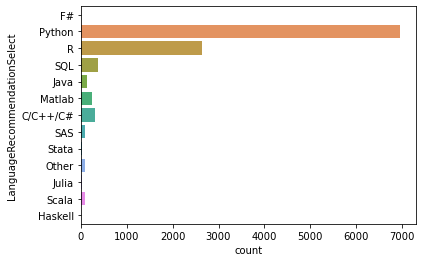

In [3]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

*현재 하고 있는 일*

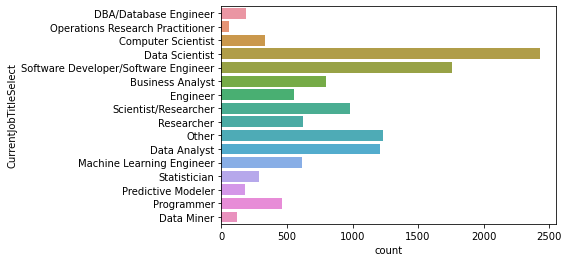

In [4]:
sns.countplot(y=mcq['CurrentJobTitleSelect'])

*현재 하고 있는 일에 대한 전체 응답 수*

In [5]:
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

*현재 일을 하고있는 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지*

(7158, 228)


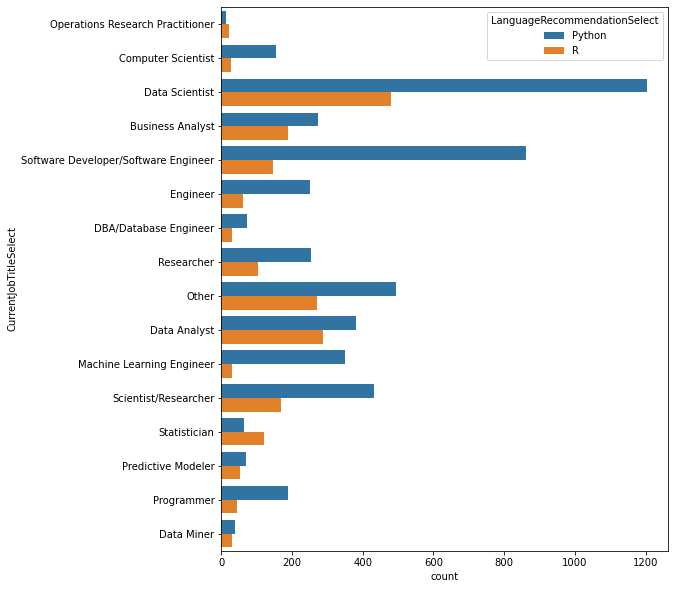

In [6]:
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | (
        mcq['LanguageRecommendationSelect'] == 'R'))] 
print(data.shape)

plt.figure(figsize=(8,10))
sns.countplot(y='CurrentJobTitleSelect',hue='LanguageRecommendationSelect',
            data=data)

#### Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?
 : 관련 분야 종사자가 아니더라도 빅데이터, 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고있다. 응답자들이 내년에 가장 흥미로운 기술이 될 것이라 응답한 결과

**데이터사이언스 툴**

In [7]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


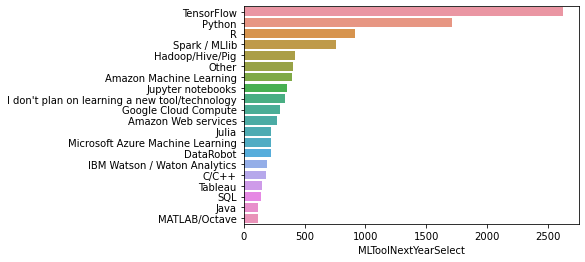

In [8]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index,x=data)

**다음 해에 주목할 만한 Data Science Methods**

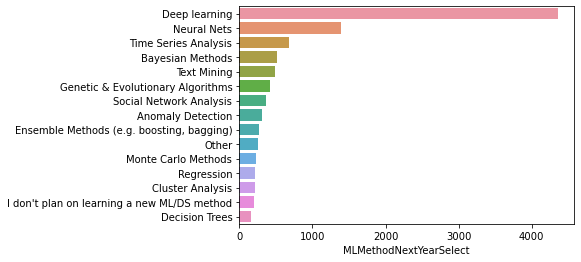

In [9]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

### Q3. 어디에서 데이터 사이언스를 배워야 할까요?

**astype()** : 특정 column의 데이터 타입을 변경

In [10]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1,drop=True)
s.name = 'platform'

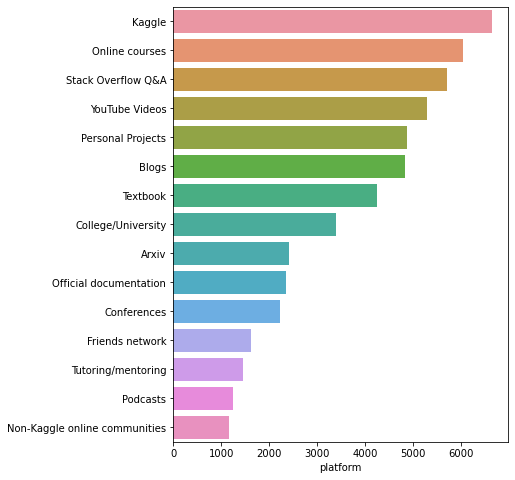

In [11]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

*설문내용과 누구에게 물어봤는지 알아봄*

In [12]:
qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [13]:
use_features = [x for x in mcq.columns if x.find(
        'LearningPlatformUsefulness') != -1 ]

*학습플랫폼과 유용함에 대해 연관성을 알아봄*

**transpos()** : row 과 column을 바꿈
**srot_values()** : 열 기준으로 정렬
  - default는 오름차순
  - 내림차순은 ascending=False
  
**heatmap** : heat = 열, 색상으로 표현할 수 있는 다양한 정보(열분포 형태)
  - annot = True : 숫자를 출력해서 같이 보여줌

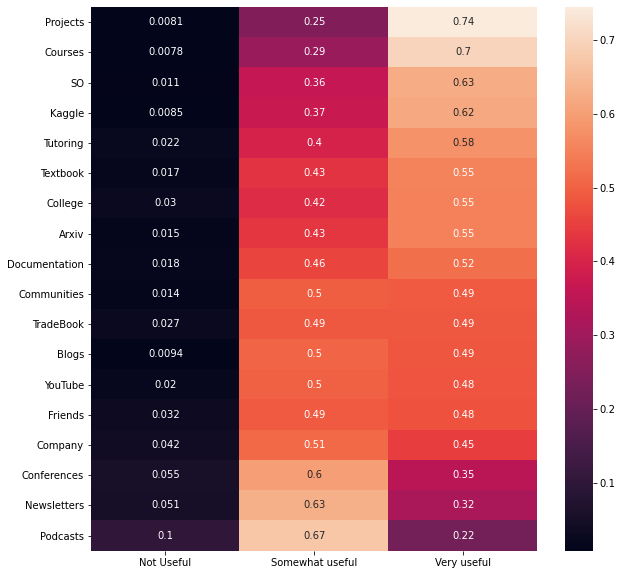

In [14]:
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]]=a
    
fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그림
plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending=False), annot=True)

*유용함의 정도를 각 플랫폼별로 그룹화해서 보여줌*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

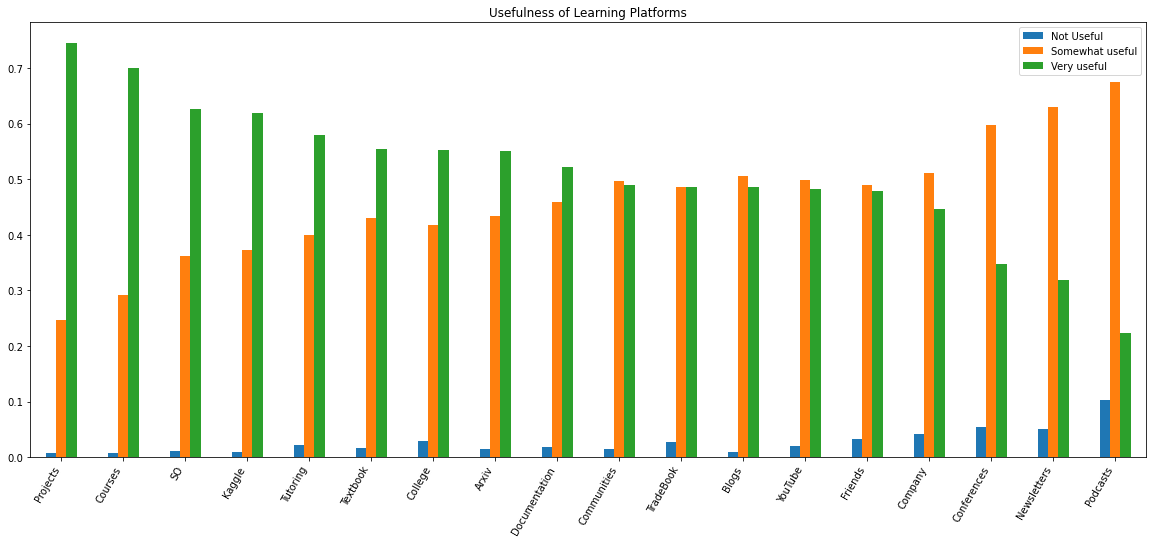

In [15]:
fdf.plot(kind='bar', figsize=(20,8),
            title="Usefulness of Learning Platforms")
plt.xticks(rotation=60, ha='right')


In [16]:
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [17]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()
    
# 파이차트를 그리기 위해 평균 값을 구해와서 담아줌
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

**pie(data, labels=labels, shadow=True, startangle=angle)**
- autopct : float 형식 지정
- shadow : 그림자 유/무
- startangle : 그래프 시작 지점 각도 

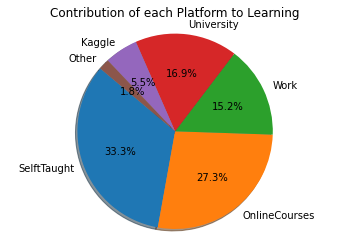

In [18]:
# 학습 플랫폼 별 도움이 되는 정도
plt.pie(cdf, labels=cdf.index,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

### Q4. 데이터 과학을 위해 높은 사양의 컴퓨터가 필요한가요?

*설문 내용과 누구에게 물어봤는지를 알아봄*

In [19]:
qc = question.loc[question[
    'Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [20]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

**apply()** : Python 리스트에서 map()과 같은 개념, DataFrame에서는 apply() 함수 적용
- 복잡한 연산을 벡터화 할 수 있게 함
- 간단한 연산은 lambda()를 사용

    **lambda**
    
    
    lambda x : x['Column']의 조건식, axis=1)
    
**stack()** : 데이터 재구조화

In [21]:
mcq['HardwarePersonalProjectsSelect']= mcq['HardwarePersonalProjectsSelect'
                                          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x:
                pd.Series(x['HardwarePersonalProjectsSelect']),
                 axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [22]:
s = s[s != 'nan']

In [23]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
GCE ...),669
Laptop + Cloud service (AWS,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


### Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용 하는지?

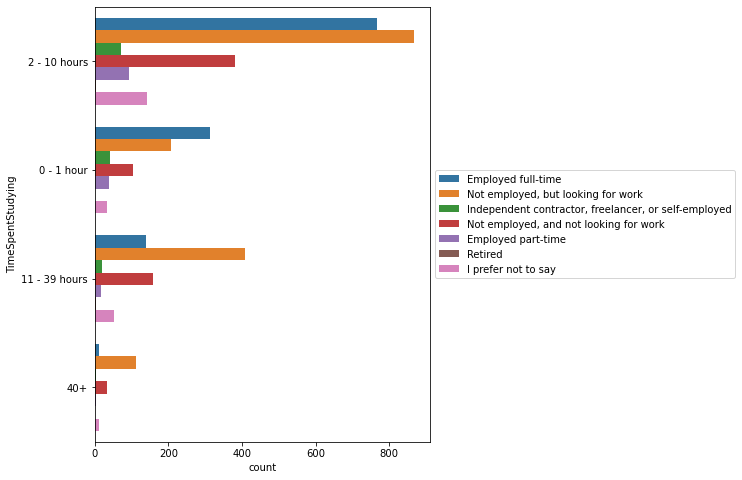

In [24]:
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying',data=mcq,
                 hue='EmploymentStatus').legend(loc='center left',
                 bbox_to_anchor=(1,0.5))

countplot의 **hue** : 카테고리형 데이터가 섞여 있을 경우 hue 인수를 통해 카테고리 변수이름을 지정하여 카테고리 값에 따라 색상을 다르게 함

In [25]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]

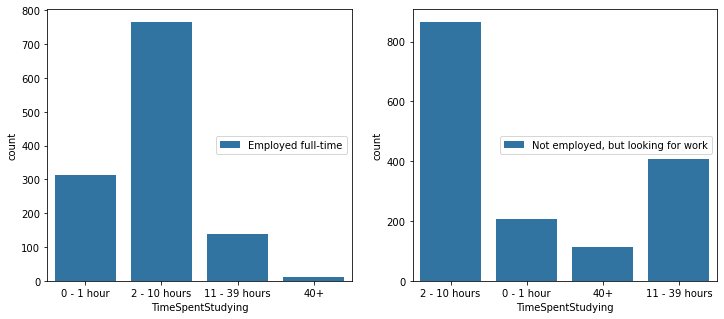

In [26]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', 
              data=full_time, 
              hue='EmploymentStatus', ax=ax1
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying', 
              data=looking_for_job, 
              hue='EmploymentStatus', ax=ax2
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))


### Q6. 블로그, 팟캐스트, 수업, 기타 등등 추천할만한 것이 있는지?

In [27]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
    'BlogsPodcastsNewslettersSelect'
].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [28]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [29]:
s = s[s != 'nan'].value_counts().head(20)

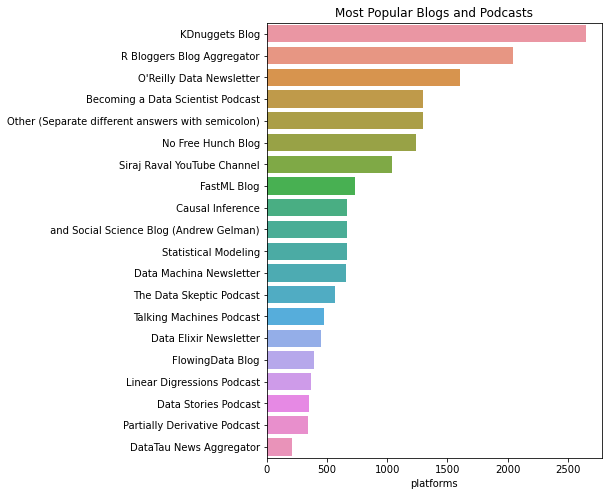

In [30]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

In [31]:
mcq['CoursePlatformSelect'] = mcq[
    'CoursePlatformSelect'].astype('str'
                                  ).apply(lambda x: x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [32]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),
              axis=1).stack().reset_index(level=1,drop=True)
t.name = 'coruses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: coruses, dtype: object

In [33]:
t = t[t != 'nan'].value_counts()

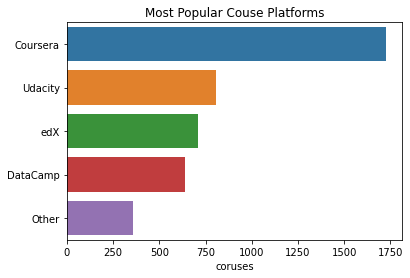

In [34]:
plt.title("Most Popular Couse Platforms")
sns.barplot(y=t.index, x=t)